In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_theme()
plt.rc('figure', max_open_warning = 0)


In [67]:
#Read in CSV file into cars DataFrame with Col 0 a.k.a. Car_ID as the index

cars = pd.read_csv('CarPrice_Assignment.csv', index_col=0)
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [68]:
#Converting CarName into CarMake and CarModel

car_manufacture_name = cars['CarName'].str.split(' ', n=1, expand=True)
cars = cars.drop('CarName', axis=1)
cars.insert(1, "carMake", car_manufacture_name[0])
cars.insert(2, "carModel", car_manufacture_name[1])

In [69]:
#Preview change to cars

cars.head()

,symboling,carMake,carModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [70]:
#See all types of car makers

cars.carMake.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [71]:
#Fix spelling mistakes

cars = cars.replace(to_replace="maxda", value="mazda")
cars = cars.replace(to_replace="Nissan", value="nissan")
cars = cars.replace(to_replace="porcshce", value="porsche")
cars = cars.replace(to_replace="toyouta", value="toyota")
cars = cars.replace(to_replace="vokswagen", value="volkswagen")
cars = cars.replace(to_replace="vw", value="volkswagen")

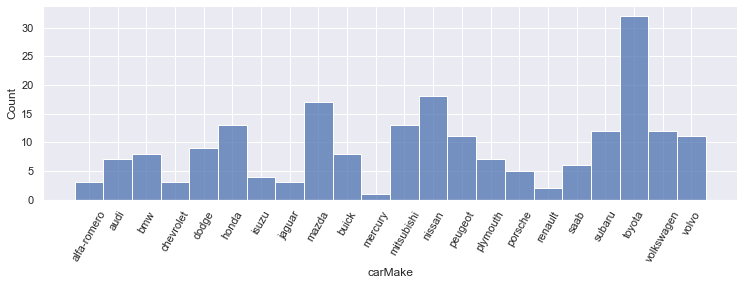

In [74]:
#Show amount of differnt makers of cars

sns.displot(data=cars, x="carMake", height=3.5, aspect=3).set_xticklabels(rotation=60)


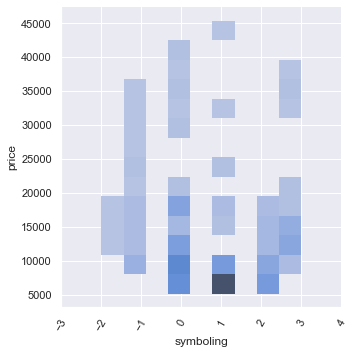

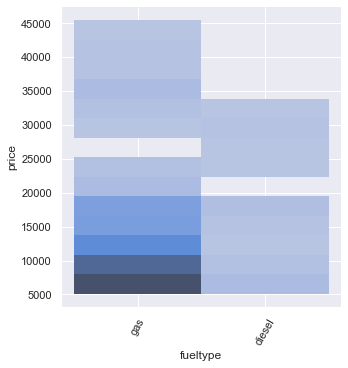

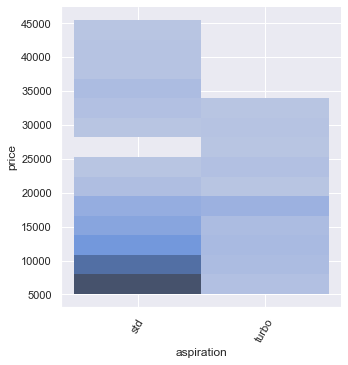

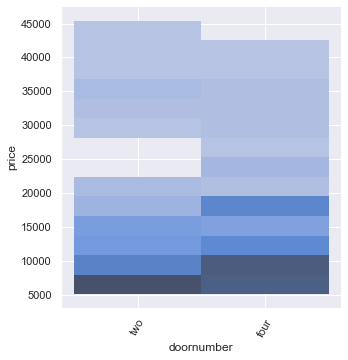

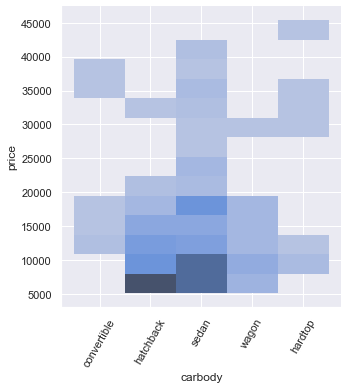

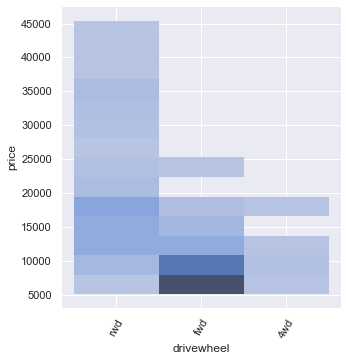

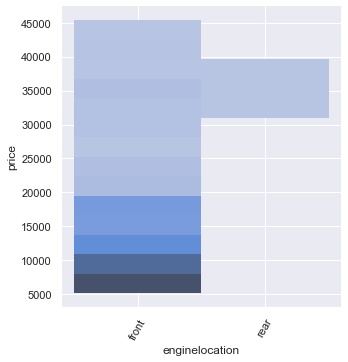

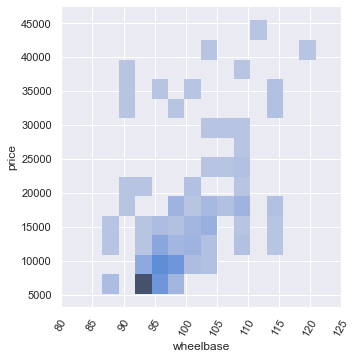

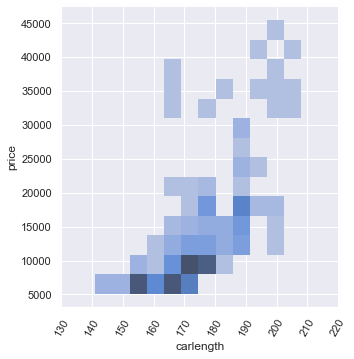

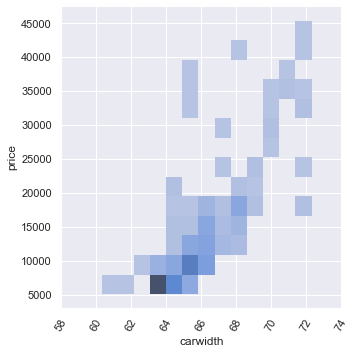

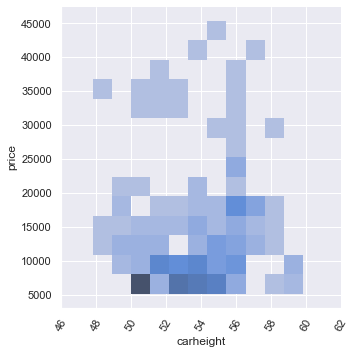

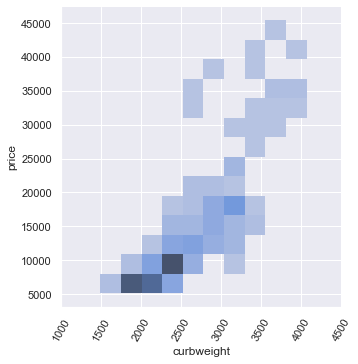

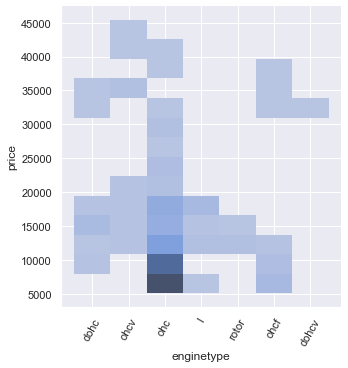

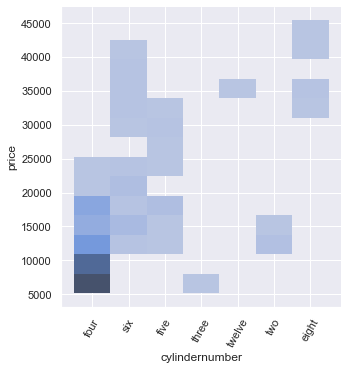

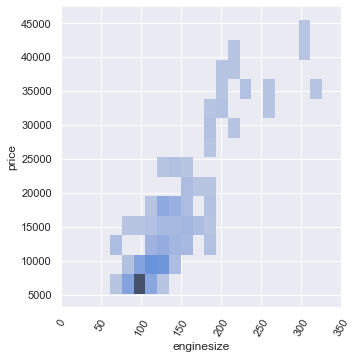

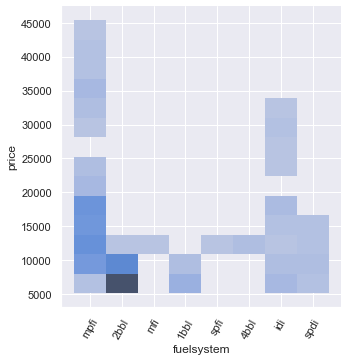

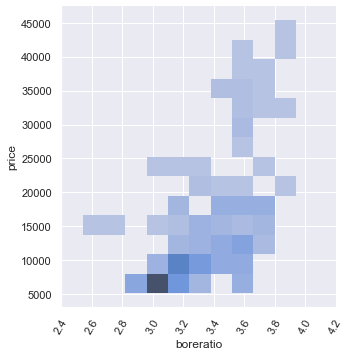

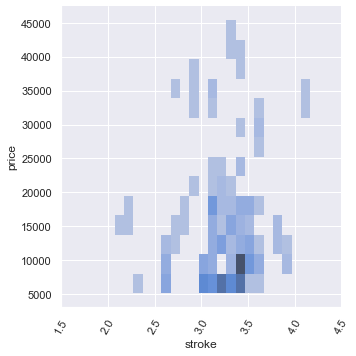

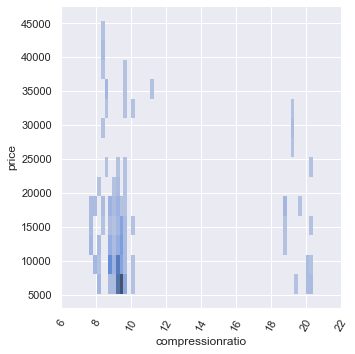

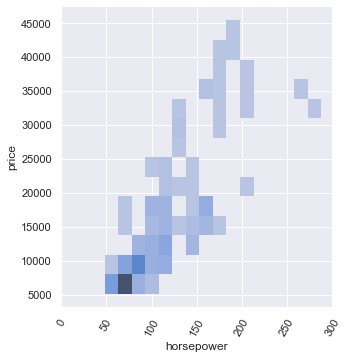

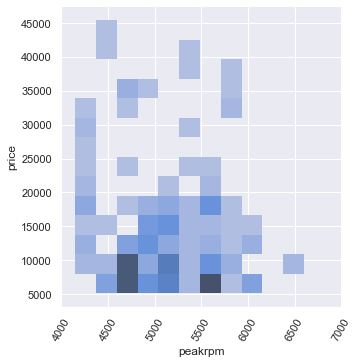

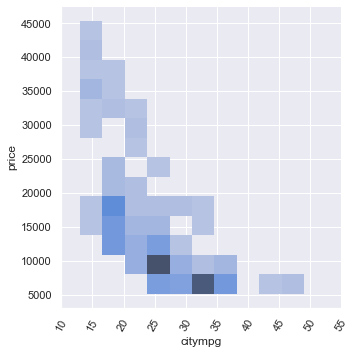

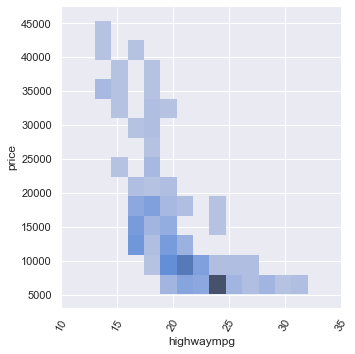

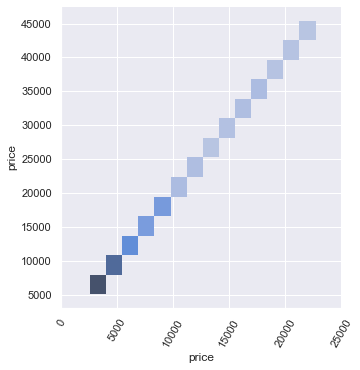

In [80]:
cols = list(cars.columns)
cols.remove("carMake")
cols.remove("carModel")

for col in cols:
    sns.displot(data=cars, x=col, y="price").set_xticklabels(rotation=60)

In [107]:
y = cars.price
x = cars
x = x.drop('carMake', axis=1)
x = x.drop('carModel', axis=1)


#symboling no relation
x = x.drop('symboling', axis=1)
#fueltype some relation
#aspiration some relation
#doornumber no relation
x = x.drop('doornumber', axis=1)
#carbody some relation
#drivewheel some relation
#enginelocation some relation
#wheelbase good relation
#carlength good relation
#carwidth good relation
#carheight no relation
x = x.drop('carheight', axis=1)
#curbweight good relation
#enginetype some relation
#cylndarnumber some relation
#enginesize good relation
#fuelsystem some relation
#boreration good relation
#stroke no relation
x = x.drop('stroke', axis=1)
#compressionratio no relation
x = x.drop('compressionratio', axis=1)
#horsepower good relation
#peakrpm no relation
x = x.drop('peakrpm', axis=1)
#citympg good relation
#highwaympg good relation

# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

x = dummies('fueltype',x)
x = dummies('aspiration',x)
x = dummies('carbody',x)
x = dummies('drivewheel',x)
x = dummies('enginelocation',x)
x = dummies('enginetype',x)
x = dummies('cylindernumber',x)
x = dummies('fuelsystem',x)

x.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,0,0,0,1,0,0
2,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,0,0,0,1,0,0
4,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,0,1,0,0
5,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [109]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(x, train_size = 0.7, test_size = 0.3, random_state = 100)

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price','citympg','highwaympg']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [114]:
df_train.head()


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
123,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.500000,0.567568,0.068818,...,0,0,0,1,0,0,0,0,0,0
126,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.166667,0.270270,0.466890,...,0,0,0,0,0,0,0,1,0,0
167,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.361111,0.324324,0.122110,...,0,0,0,0,0,0,0,1,0,0
2,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.222222,0.270270,0.314446,...,0,0,0,0,0,0,0,1,0,0
200,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.111111,0.135135,0.382131,...,0,0,0,0,0,0,0,1,0,0


In [115]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.344211,0.374976,0.219310,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.186165,0.188477,0.215682,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.166667,0.216216,0.067298,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.333333,0.378378,0.140343,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.500000,0.527027,0.313479,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


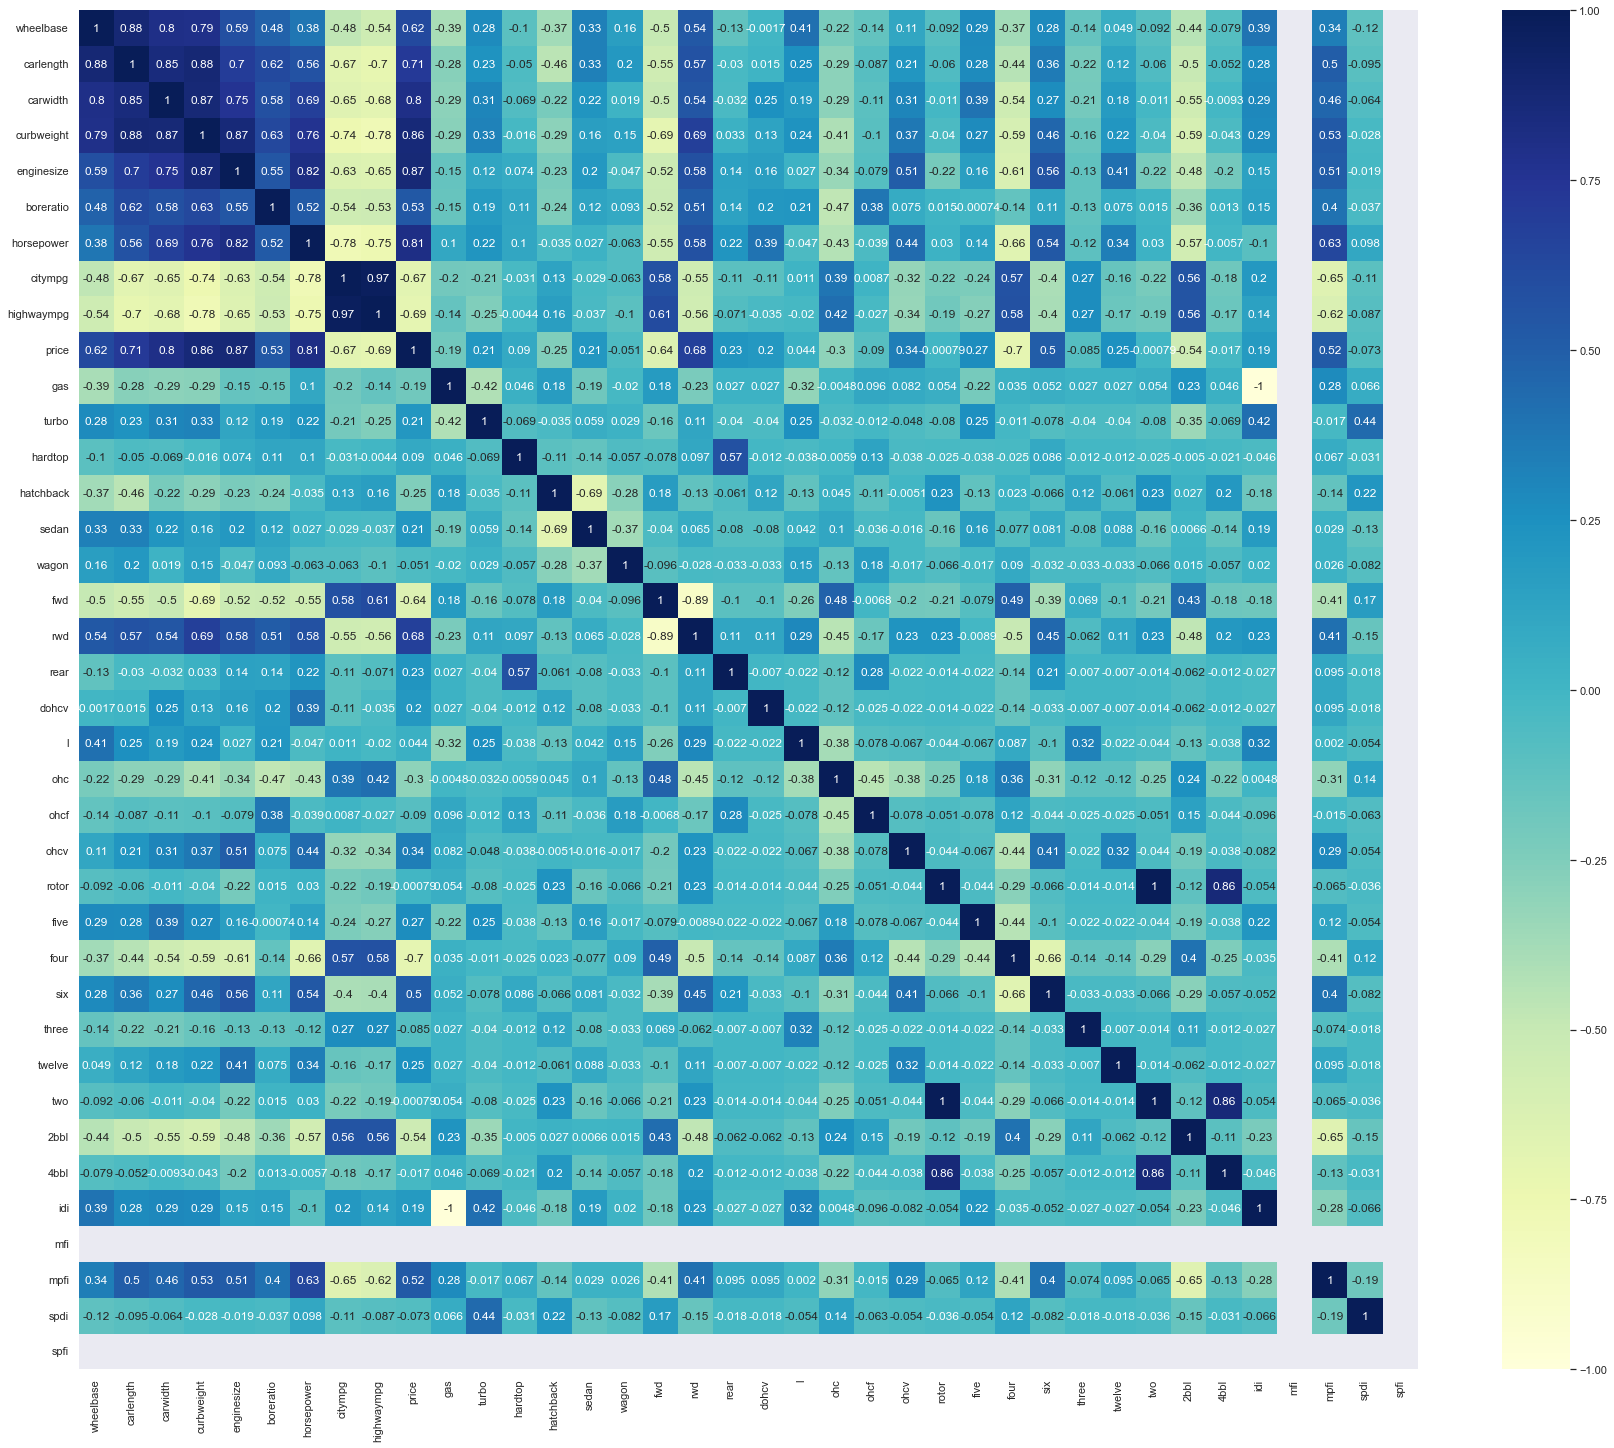

In [118]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [119]:
y_train = df_train.pop('price')
X_train = df_train

In [120]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given